In [1]:
import os
os.chdir("C:\\Users\\raja.a.muthuraman\\Downloads\\DS\\Decision Tree")

In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt 
import pydotplus
from sklearn import tree, metrics, model_selection, preprocessing
from IPython.display import Image, display
#from utils import plot_decision

# Data Import and preparation

In [3]:
# load the iris data
df = pd.read_csv('iris.csv')
df.head(5)

,sepal.length,sepal.width,petal.length,petal.width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
df['species_label'], _ = pd.factorize(df['species'])
df['species'].unique()
# df

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [5]:
# select features
y = df['species_label'] #Dependent feature
X = df[['sepal.length', 'sepal.width','petal.length']] #Independent features (subset)

In [6]:
# split data randomly into 70% training and 30% test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                                                    test_size=0.3, random_state=0)

# Training model

In [7]:
# train the decision tree
dtree = tree.DecisionTreeClassifier( max_depth=2)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

# Testing the model

In [8]:
y_pred = dtree.predict(X_test)

In [9]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.91


In [10]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[16  0  0]
 [ 0 17  1]
 [ 0  3  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.85      0.94      0.89        18
           2       0.89      0.73      0.80        11

    accuracy                           0.91        45
   macro avg       0.91      0.89      0.90        45
weighted avg       0.91      0.91      0.91        45



[Text(133.92000000000002, 181.2, 'X[2] <= 2.35\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[2] <= 4.95\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.053\nsamples = 37\nvalue = [0, 1, 36]')]

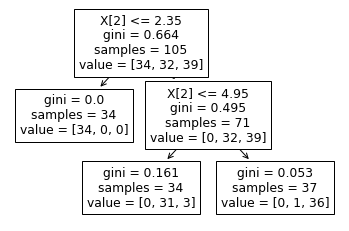

In [11]:
tree.plot_tree(dtree)

# Lets analyze the tree

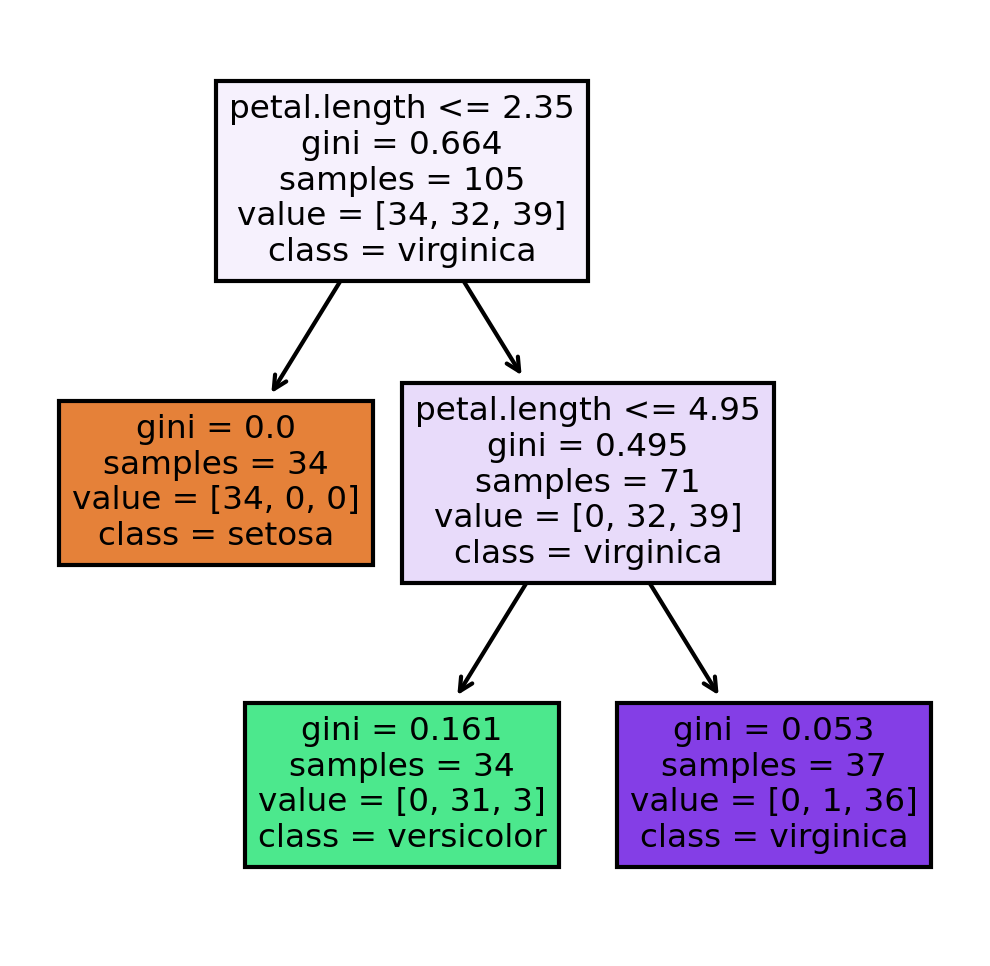

In [12]:
fn = ['sepal.length','sepal.width','petal.length']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dtree,
               feature_names = fn, 
               class_names=cn,
               filled = True);
# fig.savefig('imagename.png')

# Advantages of decision trees

# Disadvantages of decision trees

Tips on practical use
Decision trees tend to overfit on data with a large number of features. Check ratio of samples to number of features

Consider performing dimensionality reduction (PCA, ICA, or Feature selection) beforehand

Visualise your tree as you are training by using the export function. Use max_depth=3 as an initial tree depth.

Use max_depth to control the size of the tree to prevent overfitting.

Tune min_samples_split or min_samples_leaf to control the number of samples at a leaf node.

Balance your dataset before training to prevent the tree from being biased toward the classes that are dominant.

By sampling an equal number of samples from each class

By normalizing the sum of the sample weights (sample_weight) for each class to the same value.